In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
folder = "../dataset/"
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

payment_distribution 
expenditure-time_curve

basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

In [ ]:
#basic_stats["density"]=Distribución normal (mean=avg, standarddeviation=std, cortadas( min , max)
# np.random.normal(mu, sigma, 1000)

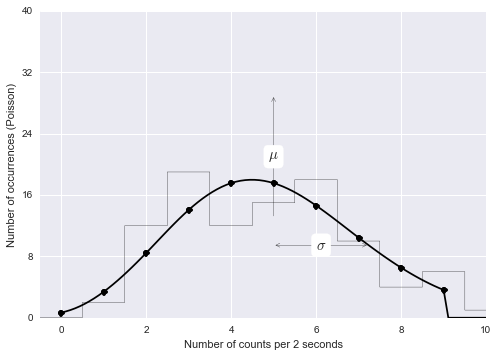

In [4]:
#https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate

def simulate_poisson():
    # Mean is 1.69
    mu = 5
    sigma = sp.sqrt(mu)
    mu_plus_sigma = mu + sigma

    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval.
    counts = stats.poisson.rvs(mu, size=100)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum value goes in its own bin instead of getting
    # added to the previous bin.
    # [0,1), [1, 2), ..., [max(counts), max(counts)+1]
    bins = range(0, max(counts)+2)

    # Plot histogram.
    plt.hist(counts, bins=bins, align="left", histtype="step", color="black")

    # Create Poisson distribution for given mu.
    x = range(0,10)
    prob = stats.poisson.pmf(x, mu)*100 

    # Plot the PMF.
    plt.plot(x, prob, "o", color="black")

    # Draw a smooth curve through the PMF.
    l = sp.linspace(0,11,100)
    s = interpolate.spline(x, prob, l)
    plt.plot(l,s,color="black")

    plt.xlabel("Number of counts per 2 seconds")
    plt.ylabel("Number of occurrences (Poisson)")

    # Interpolated probability at x = μ + σ; for marking σ in the graph.
    xx = sp.searchsorted(l,mu_plus_sigma) - 1
    v = ((s[xx+1] -  s[xx])/(l[xx+1]-l[xx])) * (mu_plus_sigma - l[xx])
    v += s[xx]

    ax = plt.gca()
    # Reset axis range and ticks.
    ax.axis([-0.5,10, 0, 40])
    ax.set_xticks(range(1,10), minor=True)
    ax.set_yticks(range(0,41,8))
    ax.set_yticks(range(4,41,8), minor=True)

    # Draw arrow and then place an opaque box with μ in it.
    ax.annotate("", xy=(mu,29), xycoords="data", xytext=(mu, 13),
                textcoords="data", arrowprops=dict(arrowstyle="->",
                                                   connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu, 21, r"$\mu$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Draw arrow and then place an opaque box with σ in it.
    ax.annotate("", xy=(mu,v), xytext=(mu_plus_sigma,v),
                arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu+(sigma/2.0), v, r"$\sigma$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Refresh plot and save figure.
    plt.draw()
    plt.savefig("simulate_poisson.png")

simulate_poisson()